## Mas informacion en:

https://distill.pub/2016/misread-tsne/
https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py
https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [31]:
import pandas as pd

In [ ]:
n_samples = 300
n_components = 2

In [84]:
perplexities = [5, 10, 15, 30, 50, 75, 100]

In [28]:
X, y = datasets.make_blobs(n_samples=n_samples, n_features=30, cluster_std=5.0,)

red = y == 0
green = y == 1
blue = y == 2

In [76]:
LDs = pd.read_csv("Analysis/Banxico/R_container/Docker/generadorReporte/data/500G/ResModeloDatosenLD.csv", header=0)
LDs = LDs.drop(["Unnamed: 0"], axis=1)

In [77]:
clases = pd.read_csv("Analysis/Banxico/R_container/Docker/generadorReporte/data/500G/ResModeloPredClas.csv", header=0, index_col=0)

In [78]:
def asignar_color(NGRUPOS):
    color_codes = ["#%02x%02x%02x"%(int(r), int(g), int(b)) \
            for r, g, b, _ in 255*cm.jet(colors.Normalize()(range(NGRUPOS)))
    ]
    return color_codes

In [102]:
colorsn = asignar_color(14)
colorsdict = dict(zip(np.unique(clases), colorsn))
foo = [1, 2, 3, 4, 17, 20, 28, 66, 100, 614, 616, 629, 631, 932]
keydict = dict(zip(np.unique(clases), foo))

In [80]:
LDs["Clase"] = clases.values

circles, perplexity=5 in 1.8 sec
circles, perplexity=10 in 1.7 sec
circles, perplexity=15 in 1.9 sec
circles, perplexity=30 in 2.1 sec
circles, perplexity=50 in 2.8 sec
circles, perplexity=75 in 2.8 sec
circles, perplexity=100 in 3.6 sec


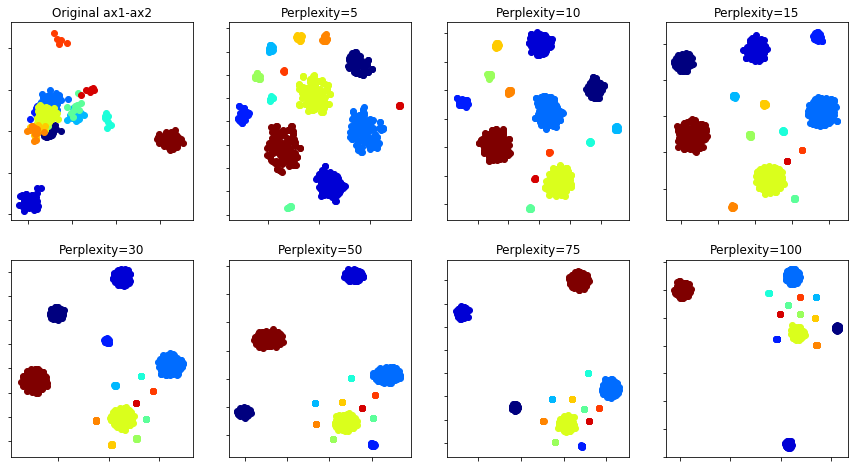

In [85]:
(fig, subplots) = plt.subplots(2, 4, figsize=(15, 8))
subplots = subplots.reshape(-1, )
ax = subplots[0]
ax.set_title("Original ax1-ax2")
for ci in np.unique(clases):
    ldsci = LDs.loc[LDs["Clase"] == ci]
    ax.scatter(ldsci["LD1"], ldsci["LD2"], c=colorsdict[ci])
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(LDs.drop(["Clase"], axis=1))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    for ci in np.unique(clases):
        Yci = Y[LDs["Clase"] == ci]
        ax.scatter(Yci[:, 0], Yci[:, 1], c=colorsdict[ci])
    #ax.scatter(Y[red, 0], Y[red, 1], c="r")
    #ax.scatter(Y[green, 0], Y[green, 1], c="g")
    #ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

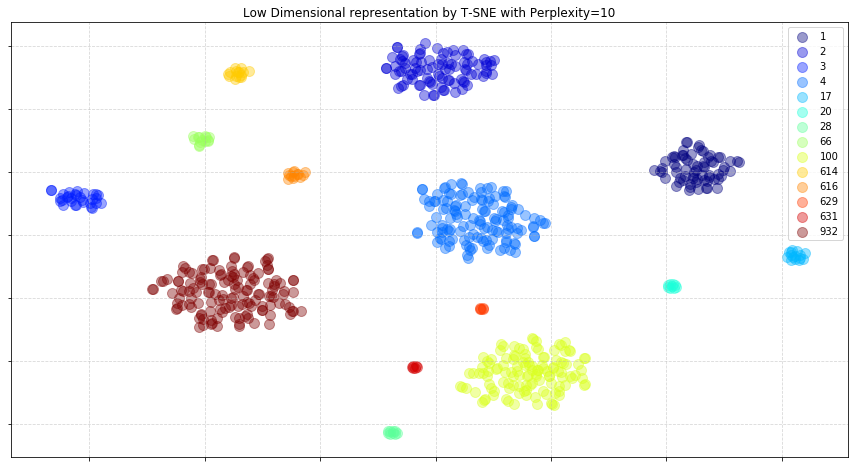

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
t0 = time()
perplexity = 10
tsne = manifold.TSNE(n_components=n_components, init='random',
                     random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(LDs.drop(["Clase"], axis=1))
t1 = time()
# print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
ax.set_title("Low Dimensional representation by T-SNE with Perplexity=%d" % perplexity)
for ci in np.unique(clases):
    Yci = Y[LDs["Clase"] == ci]
    ax.scatter(Yci[:, 0], Yci[:, 1], c=colorsdict[ci], s=100, alpha=0.4, label=keydict[ci])
#ax.scatter(Y[red, 0], Y[red, 1], c="r")
#ax.scatter(Y[green, 0], Y[green, 1], c="g")
#ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.legend()
ax.grid(alpha=0.5, linestyle="--")
ax.axis('tight')

plt.show()